In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
anime = pd.read_csv("../input/anime-recommendations-database/anime.csv")
anime[:5]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print(anime.shape)

(12294, 7)


In [9]:
user = pd.read_csv("../input/anime-recommendations-database/rating.csv")
user.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [6]:
print(user.shape)

(7813737, 3)


# Definition of Like

Anime which got rating higher than user rating mean will assign as like

**Example: Rating mean of user 10**

In [10]:
user[user["user_id"]==10]

,user_id,anime_id,rating
1162,10,20,-1
1163,10,1535,-1
1164,10,2581,-1
1165,10,5114,10
1166,10,9253,-1
1167,10,11757,9
1168,10,16498,-1
1169,10,21881,9


In [15]:
# max rating of user 10
user[user["user_id"]==10].rating.max()

10

In [16]:
# mean rating of user 10
user[user["user_id"]==10].rating.mean()

2.875

## Calculate mean rating per user

In [23]:
MRPU = user.groupby(["user_id"]).mean().reset_index()
MRPU["mean_rating"] = MRPU["rating"]

MRPU.drop(["anime_id", "rating"], axis=1, inplace=True)

MRPU

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
...,...,...
73510,73512,7.846154
73511,73513,7.515152
73512,73514,10.000000
73513,73515,7.719388


In [24]:
user = pd.merge(user, MRPU, on=["user_id", "user_id"])

user.head(5)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418


In [25]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [26]:
user[user["user_id"]==10].head(10)

,user_id,anime_id,rating,mean_rating
1165,10,5114,10,2.875
1167,10,11757,9,2.875
1169,10,21881,9,2.875


In [27]:
print(user.shape)

(4262566, 4)


In [28]:
user["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516])

### Combine two datasets

To reduce size of dataset

In [34]:
mergedata = pd.merge(anime, user, on=["anime_id", "anime_id"])
mergedata = mergedata[mergedata.user_id <= 20000]
mergedata.head(10)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8,7.374593
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10,8.062500
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10,8.112360
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10,8.388889
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10,8.680328


In [30]:
len(mergedata["anime_id"].unique())

7852

In [31]:
len(anime["anime_id"].unique())

12294

## Create Crosstable
Show detail of anime which user like

In [36]:
user_anime = pd.crosstab(mergedata["user_id"], mergedata["name"])
user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
user_anime.shape

(20000, 7852)

## Principal Component Analysis
To reduce dimension of data for clustering and visualize

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [39]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2
0,-1.579129,-0.500240,0.415765
1,-1.773553,-0.272593,0.116389
2,0.218814,-1.232282,-0.985800
3,0.199435,-0.291005,0.681049
4,3.532125,-0.184796,-0.743319


In [42]:
toCluster = pd.DataFrame(ps[[0, 1, 2]])

# Select number of K

**Silhouette score** is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. 

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(toCluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(toCluster, kmeans.labels_))

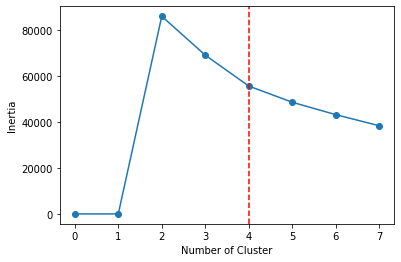

In [50]:
plt.plot(range(0, 8), inertia_list, "-o")
plt.xlabel("Number of Cluster")
plt.axvline(x=4, color="red", linestyle="--")
plt.ylabel("Inertia")
plt.show()

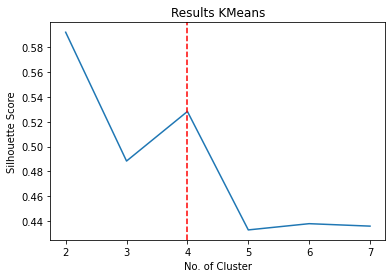

In [51]:
plt.plot(range(2, 8), scores)
plt.title("Results KMeans")
plt.xlabel("No. of Cluster")
plt.axvline(x=4, color="red", linestyle="--")
plt.ylabel("Silhouette Score")
plt.show()

# KMeans Clustering

In [56]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4, random_state=42).fit(toCluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(toCluster)

print(centers)

[[ 1.67196642  2.31116347 -0.02445746]
 [-1.08558179 -0.04182849  0.06655784]
 [ 7.61706623 -0.63839951  0.8404449 ]
 [ 1.99587475 -1.13262732 -0.44024652]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


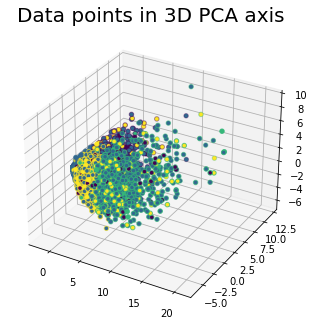

In [57]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(toCluster[0], toCluster[1], toCluster[2], c = c_preds)
plt.title("Data points in 3D PCA axis", fontsize=20)

plt.show()

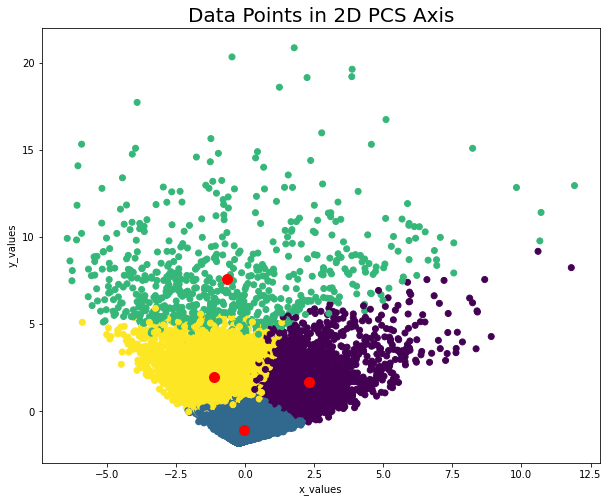

In [59]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(toCluster[1], toCluster[0], c=c_preds)
for ci, c in enumerate(centers):
    plt.plot(c[1], c[0], "o", markersize=10, color="red", alpha=1)
    

plt.xlabel("x_values")
plt.ylabel("y_values")

plt.title("Data Points in 2D PCS Axis", fontsize=20)
plt.show()

In [60]:
user_anime["cluster"] = c_preds

user_anime.head(10)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Characteristic of Each Cluster

In [62]:
c0 = user_anime[user_anime["cluster"]==0].drop("cluster", axis=1).mean()
c0

name
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi    0.014119
&quot;Bungaku Shoujo&quot; Memoire                     0.011198
&quot;Bungaku Shoujo&quot; Movie                       0.023856
&quot;Eiji&quot;                                       0.000487
.hack//G.U. Returner                                   0.013632
                                                         ...   
xxxHOLiC                                               0.194742
xxxHOLiC Kei                                           0.148491
xxxHOLiC Movie: Manatsu no Yoru no Yume                0.102726
xxxHOLiC Rou                                           0.052580
xxxHOLiC Shunmuki                                      0.076436
Length: 7852, dtype: float64

In [63]:
c1 = user_anime[user_anime["cluster"]==1].drop("cluster", axis=1).mean()
c1

name
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi    0.000859
&quot;Bungaku Shoujo&quot; Memoire                     0.001073
&quot;Bungaku Shoujo&quot; Movie                       0.001718
&quot;Eiji&quot;                                       0.000000
.hack//G.U. Returner                                   0.001217
                                                         ...   
xxxHOLiC                                               0.018178
xxxHOLiC Kei                                           0.010234
xxxHOLiC Movie: Manatsu no Yoru no Yume                0.005511
xxxHOLiC Rou                                           0.002362
xxxHOLiC Shunmuki                                      0.003149
Length: 7852, dtype: float64

In [65]:
c2 = user_anime[user_anime["cluster"]==2].drop("cluster", axis=1).mean()
c2

name
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi    0.061947
&quot;Bungaku Shoujo&quot; Memoire                     0.069322
&quot;Bungaku Shoujo&quot; Movie                       0.131268
&quot;Eiji&quot;                                       0.000000
.hack//G.U. Returner                                   0.025074
                                                         ...   
xxxHOLiC                                               0.191740
xxxHOLiC Kei                                           0.157817
xxxHOLiC Movie: Manatsu no Yoru no Yume                0.097345
xxxHOLiC Rou                                           0.100295
xxxHOLiC Shunmuki                                      0.107670
Length: 7852, dtype: float64

In [66]:
c3 = user_anime[user_anime["cluster"]==3].drop("cluster", axis=1).mean()
c3

name
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi    0.004552
&quot;Bungaku Shoujo&quot; Memoire                     0.004552
&quot;Bungaku Shoujo&quot; Movie                       0.010926
&quot;Eiji&quot;                                       0.000000
.hack//G.U. Returner                                   0.001517
                                                         ...   
xxxHOLiC                                               0.023672
xxxHOLiC Kei                                           0.015478
xxxHOLiC Movie: Manatsu no Yoru no Yume                0.003945
xxxHOLiC Rou                                           0.006677
xxxHOLiC Shunmuki                                      0.006070
Length: 7852, dtype: float64

## Cluster 0
Top 15 anime of cluster 0

In [68]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.680136
Code Geass: Hangyaku no Lelouch       0.666991
Code Geass: Hangyaku no Lelouch R2    0.608569
Fullmetal Alchemist                   0.599805
Sen to Chihiro no Kamikakushi         0.583739
Suzumiya Haruhi no Yuuutsu            0.550633
Neon Genesis Evangelion               0.537001
Tengen Toppa Gurren Lagann            0.528238
Cowboy Bebop                          0.524830
Fullmetal Alchemist: Brotherhood      0.509250
Mononoke Hime                         0.500487
Toradora!                             0.488802
Elfen Lied                            0.482960
Howl no Ugoku Shiro                   0.480039
Samurai Champloo                      0.477605
dtype: float64

In [84]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list = list()
    for x in anime["name"]:
        if x in animelist:
            episode_list.append(anime[anime["name"]==x].episodes.values.astype(int))
            member_list.append(anime[anime["name"]==x].members.values.astype(int))
            rating_list.append(anime[anime["name"]==x].rating.values.astype(int))
            
            for y in anime[anime["name"]==x].genre.values:
                genre_list.append(y)
                
    return genre_list, episode_list, rating_list, member_list

In [96]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(","):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in [s for s in liste_keywords if s in liste]:
            if pd.notnull(s): keyword_count[s] += 1
    
    keyword_occurences = []
    for k, v in keyword_count.items():
        keyword_occurences.append([k, v])
    keyword_occurences.sort(key=lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [97]:
animelist = list(c0.index)
data = pd.DataFrame()
data["genre"], data["episode"], data["rating"], data["member"] = createAnimeInfoList(animelist)

In [98]:
set_keywords = set()
for liste_keywords in data["genre"].str.split(",").values:
    if isinstance(liste_keywords, float): continue
    set_keywords = set_keywords.union(liste_keywords)

In [101]:
from wordcloud import WordCloud

def makeCloud(Dict, name, color):
    words = dict()
    
    for s in Dict:
        words[s[0]] = s[1]
        
        wordcloud = WordCloud( width=1500,
                              height=500,
                              background_color=color,
                              max_words=20,
                              max_font_size=500,
                              normalize_plurals=False
        )
        wordcloud.generate_from_frequencies(words)
        
    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.show()

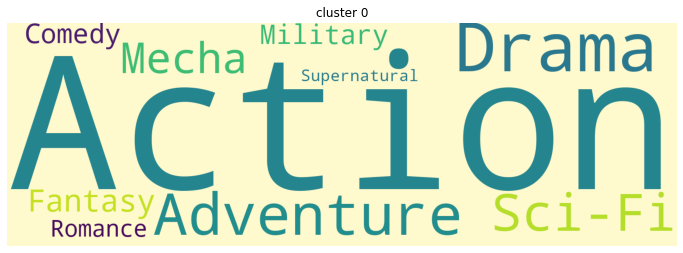

In [102]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data["genre"], c0_data["episode"], c0_data["rating"], c0_data["member"] = createAnimeInfoList(c0_animelist)
c0_data.iloc[:, 1:4] = c0_data.iloc[:, 1:4].astype(int)

keyword_occurences, dum = count_word(c0_data, "genre", set_keywords)
makeCloud(keyword_occurences[0:10], "cluster 0", "lemonchiffon")

In [103]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Adventure', 6],
 [' Sci-Fi', 6],
 [' Mecha', 4]]

In [105]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


## Cluster 1

In [106]:
c1.sort_values(ascending=False)[0:15]

name
Death Note                            0.320761
Shingeki no Kyojin                    0.231017
Sword Art Online                      0.199385
Fullmetal Alchemist: Brotherhood      0.182065
Code Geass: Hangyaku no Lelouch       0.179417
Sen to Chihiro no Kamikakushi         0.159808
Angel Beats!                          0.157661
Fullmetal Alchemist                   0.155800
Code Geass: Hangyaku no Lelouch R2    0.154011
Naruto                                0.146354
Elfen Lied                            0.144135
Ouran Koukou Host Club                0.133830
Mirai Nikki (TV)                      0.121735
Toradora!                             0.118586
Howl no Ugoku Shiro                   0.114578
dtype: float64

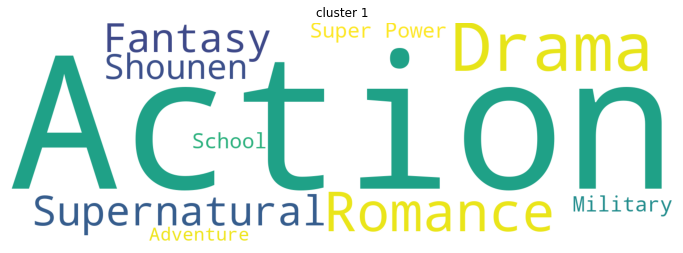

In [108]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [109]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Romance', 5],
 [' Supernatural', 5],
 [' Fantasy', 5]]

In [110]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


## Cluster 2

In [111]:
c2.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.836283
No Game No Life                                        0.818584
Toradora!                                              0.815634
Code Geass: Hangyaku no Lelouch                        0.803835
Steins;Gate                                            0.792035
Shingeki no Kyojin                                     0.783186
Code Geass: Hangyaku no Lelouch R2                     0.777286
Sword Art Online                                       0.768437
Bakemonogatari                                         0.758112
Death Note                                             0.755162
Hataraku Maou-sama!                                    0.730088
Fullmetal Alchemist: Brotherhood                       0.730088
Clannad                                                0.724189
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.721239
Chuunibyou demo Koi ga Shitai!                         0.718289
dtype: float64

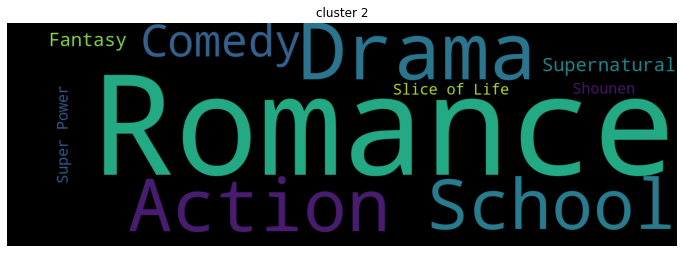

In [112]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [113]:
keyword_occurences[0:5]

[[' Romance', 7], [' Drama', 7], ['Action', 6], [' School', 6], ['Comedy', 5]]

In [114]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


## Cluster 3

In [115]:
c3.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.728073
No Game No Life                                             0.647041
Sword Art Online                                            0.614568
Angel Beats!                                                0.600303
Death Note                                                  0.593020
Steins;Gate                                                 0.553869
Fullmetal Alchemist: Brotherhood                            0.541426
Toradora!                                                   0.517754
Mirai Nikki (TV)                                            0.515933
Code Geass: Hangyaku no Lelouch                             0.507132
Code Geass: Hangyaku no Lelouch R2                          0.479211
Noragami                                                    0.468892
One Punch Man                                               0.465250
Tokyo Ghoul                                                 0.464643
Ano Hi Mita Hana no Namae wo 

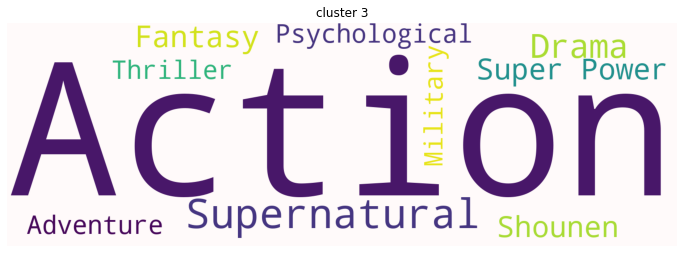

In [116]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [117]:
keyword_occurences[0:5]

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Fantasy', 4],
 [' Super Power', 4]]

In [118]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2
